In [1]:
from model_loading import *
from prediction import *

/Users/rebeccakrall/miniconda3/envs/tf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_folder = "/Users/rebeccakrall/Desktop/Model Saving Test/Scratch_012425"
model_data, data_specs = load_seg_model_data("/Users/rebeccakrall/Desktop/Model Saving Test/Scratch_012425")

In [154]:
model_data['checkpoint_dir'] = "/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Models/scratch_120624/scratch_120624_checkpoints"

In [155]:
model = load_seg_model_weights(model_data)

Running on single GPU  /device:GPU:0
Number of accelerators:  1


In [156]:
model_data

{'checkpoint_dir': '/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Models/scratch_120624/scratch_120624_checkpoints',
 'checkpoint_path': None,
 'model_id': 'a0',
 'resolution': 172,
 'batch_size': 8,
 'num_frames': 30,
 'num_classes': 1,
 'loss_name': None,
 'learning_rate': 0.0001,
 'class_labels': {'Not Scratch': 1, 'Scratch': 0}}

In [157]:
save_segmentation_model("/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Models/scratch_120624", model_data, data_specs, None, None, None)

In [9]:
table_file="/Users/rebeccakrall/Desktop/PRX_03_Validation_Sheet.csv"
save_folder="/Users/rebeccakrall/Desktop/scratch_120624_predictions"
# tbl, metadata = load_experiment_table(table_file="/Users/rebeccakrall/Desktop/PRX_03_Validation_Sheet_short.csv")

In [ ]:
predict_from_table(table_file, model, model_data, data_specs, save_folder)

In [11]:
from model_validation import *

In [221]:
path = "/Users/rebeccakrall/Data/Video Processing and Prediction/Scratching_Projects/PRX_03/PRX_03_Videos/PRX_03_Run_3_Computer_2_D12_Males_16DEC22.mp4"
animal = 'm4'

with open("/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Model and Training Set Development/scratch_120624_predictions/predictions/PRX_03_Run_3_Computer_2_D12_Males_16DEC22.mp4_33.pkl", 'rb') as f:
    logits = pickle.load(f)

window = 10
delay_start = 4


In [219]:
%matplotlib inline
import matplotlib.pyplot as plt

In [85]:
"PRX_03_Run_3_Computer_1_D12_Males_16DEC22.mp4_30.pkl".rpartition('_')[-1]

'30.pkl'

In [16]:
model_data

{'checkpoint_dir': 'Models/scratch_120624',
 'checkpoint_path': None,
 'model_id': 'a0',
 'resolution': 172,
 'batch_size': 8,
 'num_frames': 30,
 'num_classes': 1,
 'loss_name': None,
 'learning_rate': 0.0001,
 'class_labels': {'Not Scratch': 1, 'Scratch': 0}}

In [19]:
user_labled_clips, percent_presumed_wrong, percent_wrong =  validate_animal(path, animal, logits, 30, window= 2, delay_start = 0, num_clips = 10, bins = 5, labels = ['Scratch', 'Not Scratch', 'mixed'], show_label = False)

Evaluating Bin: 0 with 23 videos
Wrong: 0, Total 10
Wrong Count: 0.0
All Count: 23
Evaluating Bin: 1 with 169 videos
Wrong: 0, Total 10
Wrong Count: 0.0
All Count: 192
Evaluating Bin: 2 with 51 videos
Wrong: 4, Total 10
Wrong Count: 30.8
All Count: 269
Evaluating Bin: 3 with 260 videos
Wrong: 7, Total 10
Wrong Count: 240.8
All Count: 569
Evaluating Bin: 4 with 1229 videos
Wrong: 5, Total 9
Wrong Count: 924.1333333333334
All Count: 1799


In [232]:
path = "/Users/rebeccakrall/Data/Video Processing and Prediction/Scratching_Projects/PRX_03/PRX_03_Videos/PRX-03_Run_3_Computer_1_D8_Males_12DEC22.mp4"
animal = 'm4'

with open("/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Model and Training Set Development/scratch_120624_predictions/predictions/PRX-03_Run_3_Computer_1_D8_Males_12DEC22.mp4_26.pkl", 'rb') as f:
    logits = pickle.load(f)

# window = 10
delay_start = 2

In [233]:
circles, frames, fps, _ = get_params_from_vid(path)

In [234]:
ann = boolean_to_annotations((np.array(logits) <= 0).astype(int), 30, fps)

In [235]:
ann_delay = np.array(ann) + (delay_start * 60)
ann_dict= {'m3': ann_delay}

In [236]:
build_json_dict(path, ann_dict, "/Users/rebeccakrall/Desktop/PRX-03_Run_3_Computer_1_D8_Males_12DEC22.mp4_26.json")

{'project': {'pid': '__VIA_PROJECT_ID__',
  'rev': '__VIA_PROJECT_REV_ID__',
  'rev_timestamp': '__VIA_PROJECT_REV_TIMESTAMP__',
  'pname': 'Unnamed VIA Project',
  'creator': 'VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via)',
  'created': 1738788792295,
  'vid_list': ['1']},
 'config': {'file': {'loc_prefix': {'1': '', '2': '', '3': '', '4': ''}},
  'ui': {'file_content_align': 'center',
   'file_metadata_editor_visible': True,
   'spatial_metadata_editor_visible': True,
   'temporal_segment_metadata_editor_visible': True,
   'spatial_region_label_attribute_id': '',
   'gtimeline_visible_row_count': '4'}},
 'attribute': {'1': {'aname': 'TEMPORAL-SEGMENTS',
   'anchor_id': 'FILE1_Z2_XY0',
   'type': 4,
   'desc': 'Temporal segment attribute added by default',
   'options': {'default': 'Default'},
   'default_option_id': ''}},
 'file': {'1': {'fid': '1',
   'fname': '/Users/rebeccakrall/Data/Video Processing and Prediction/Scratching_Projects/PRX_03/PRX_03_Videos/PRX-

In [68]:
def plot_circles(vid_path, circles, radius = None):

    src = cv2.VideoCapture(str(vid_path))
    video_length = src.get(cv2.CAP_PROP_FRAME_COUNT) 

    ret = False
    count = 0

    while not ret:
        ret, frame = src.read() 
        count = count +1
        if count > video_length:
            return None
          
    src.release()
	# convert the (x, y) coordinates and radius of the circles to integers
    v = np.round(circles).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
    # for v in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
    if radius is None:
        radius = v[2]
    v = v.astype(int)
    cv2.circle(frame, (v[0], v[1]), radius, (0, 255, 0), 4)
    cv2.rectangle(frame, (v[0] - 5, v[1] - 5), (v[0] + 5, v[1] + 5), (0, 128, 255), -1)
    # show the output image
    cv2.imshow("output", frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [69]:
plot_circles(path, circles['m5'])

In [87]:
scores = pd.read_csv("/Users/rebeccakrall/Desktop/scratch_120624_predictions/scored_PRX_03_Validation_Sheet.csv")

In [94]:
vid = 'PRX_03_Run_3_Computer_1_D12_Males_16DEC22.mp4'
scores.loc[(scores['File Name'] == vid) & (scores['Subject #'] == 30),:]

,Folder Path,File Name,Subject #,Arena Location,Scoring Start (min),Scoring End (min),mouse id,bin 1,bin 2,bin 3,...,Duration: Bin 3,Bouts: Bin 3,Duration: Bin 4,Bouts: Bin 4,Duration: Bin 5,Bouts: Bin 5,Duration: Bin 6,Bouts: Bin 6,Duration: Total,Bouts: Total
20,/Users/rebeccakrall/Data/Video Processing and ...,PRX_03_Run_3_Computer_1_D12_Males_16DEC22.mp4,30,6,10,40,m4,29.59,54.94,57.19,...,30.011084,6,12.004434,3,0.0,0,0.0,0,153.278212,29


In [101]:
pred_path = "/Users/rebeccakrall/Desktop/scratch_120624_predictions/predictions"
new_dat = []
for ind, row in scores.iterrows():
    vid = row['File Name']
    sub = row['Subject #']
    fn = os.path.join(pred_path, vid + '_'+ str(sub) + '.pkl')

    with open(fn, 'rb') as file:
        prediction = pickle.load(file)
    
    circles, fraes, fps, _ = get_params_from_vid(os.path.join(row['Folder Path'], row['File Name']))
    bool_predict = np.array(prediction < 0).astype(int)
    ann = boolean_to_annotations(bool_predict, data_specs['num_frames'], fps)
    duration, bouts = bin_annotations(np.array(ann), start = 0, length = 30, bin_size = 5) # since we start the predictions at the scoring start - don't delay.
    for ind, (d,b) in enumerate(zip(duration, bouts)):
        row['Duration: Bin '+str(ind+1)] = d
        row['Bouts: Bin '+str(ind+1)] = b
    row['Duration: Total'] = sum(duration)
    row['Bouts: Total'] = sum(bouts)

    new_dat.append(row)




In [103]:
new_scores = pd.DataFrame(new_dat)

In [104]:
new_scores.to_csv("/Users/rebeccakrall/Desktop/scratch_120624_predictions/fixed_scored_PRX_03_Validation_Sheet.csv")

In [177]:
validation_sheet = "/Users/rebeccakrall/Desktop/PRX_03_Validation_Sheet.csv"
full_video_list = "/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Model and Training Set Development/011425 - Training Set Clarifications/Full_Video_List_011425.csv"

In [178]:
tbl= pd.read_csv("/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Model and Training Set Development/scratch_120624_predictions/fixed_scored_PRX_03_Validation_Sheet.csv")
vid_list = pd.read_csv(full_video_list)

In [179]:
in_train_set = []
untrained = []
for ind, row in tbl.iterrows():
    file = row['File Name'].split('.mp4')[0]
    animal = row['Animal ID']
    if vid_list.loc[(vid_list['parent file']== file) & (vid_list['animal']== animal), 'Used for training'].item():
        in_train_set.append(row)
    else:
        untrained.append(row)

trained = pd.DataFrame(in_train_set)
untrained = pd.DataFrame(untrained)

In [180]:
trained.to_csv("/Users/rebeccakrall/Desktop/PRX_03_Validation_Sheet_in_training_set.csv")

In [181]:
untrained.to_csv("/Users/rebeccakrall/Desktop/PRX_03_Validation_Sheet_not_in_training_set.csv")

In [163]:
model_specs, data_specs2 = load_seg_model_data("/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Models/scratch_120624")

In [173]:
model_specs['checkpoint_dir'] = 'Models/scratch_120624'

In [168]:
data_specs2

{'num_frames': 30, 'frame_step': 1, 'buffer': 300, 'output_size': (172, 172)}

In [174]:
model2 = load_seg_model_weights(model_specs)

Running on single GPU  /device:GPU:0
Number of accelerators:  1


In [171]:
print(tf.train.latest_checkpoint(model_specs['checkpoint_dir']))

None


In [172]:
model_specs['checkpoint_dir']

'Model/scratch_120624'

In [240]:
first = time.time() 

In [293]:
del max

In [316]:
scored = pd.read_csv("/Users/rebeccakrall/Desktop/PRX_03_Validation_Sheet_not_in_training_set.csv")
scored = scored.iloc[:, :31]

In [330]:
def calculate_validation_csv_metrics(scored):

    scores = {}
    num_bins = max([int(x.split('Bin ')[-1]) for x in scored.columns if ': Bin' in x])
    for x in range(num_bins):
        scored['dif '+str(x+1)] = scored['bin '+str(x+1)] - scored['Duration: Bin '+str(x+1)]

    scores['avg'] = scored.filter(like ='dif').mean(axis = None)
    scored['abs sum'] = scored.filter(like = 'dif').abs().sum(axis = 1)
    scores['abs_sum_mean'] = scored['abs sum'].mean()
    scores['top'] = scored.filter(like = 'dif').max(axis = None)
    scores['bottom'] = scored.filter(like = 'dif').min(axis = None)
    scores['mean'] = scored.filter(like = 'dif').mean(axis = None)
    scores['median'] = top = scored.filter(like = 'dif').median(axis = None)
    scores['worst_vid'] = scored['File Name'].iloc[scored['abs sum'].argmax()]
    scores['FP bin'] = (scored.filter(like = 'dif') < 0).sum().sum() 
    scores['FN bin'] = (scored.filter(like = 'dif') > 0).sum().sum() 

    if "Elapsed Minutes" in scored.columns:
        scores['mean_time'] = scored['Elapsed Minutes'].mean()
    else:
        scores['mean_time'] = None

    return scored, scores

In [331]:
scored, scores = calculate_validation_csv_metrics(scored)

In [332]:
scores

{'avg': -5.395370525267544,
 'abs_sum_mean': 46.21784164323684,
 'top': 44.70482305,
 'bottom': -54.489108890000004,
 'mean': -5.395370525267544,
 'median': -2.771955975000001,
 'worst_vid': 'PRX-03_Run_3_Computer_1_D8_Males_12DEC22.mp4',
 'FP bin': 152,
 'FN bin': 36,
 'mean_time': None}

In [257]:
num_bins = max([int(x.split('Bin ')[-1]) for x in scored.columns if ': Bin' in x])

In [258]:
for x in range(num_bins):
    scored['dif '+str(x+1)] = scored['bin '+str(x+1)] - scored['Duration: Bin '+str(x+1)]


In [275]:
avg = scored.filter(like ='dif').mean(axis = 1)
abs_sum = scored.filter(like = 'dif').abs().sum(axis = 1)
max = scored.filter(like = 'dif').max(axis = None)
min = scored.filter(like = 'dif').min(axis = None)
mean = scored.filter(like = 'dif').mean(axis = None)

In [321]:
(scored.filter(like = 'dif') < 0).sum().sum()

152

In [278]:
scored.filter(like ='dif').mean(axis = None)

-5.395370525267544

In [280]:
scored['bin 1'].mean()

20.775000000000002

152

In [284]:
a.argmax()

0

In [285]:
scored['File Name'].iloc[a.argmax()]

'PRX-03_Run_3_Computer_1_D8_Males_12DEC22.mp4'

In [335]:
from ast import literal_eval
def bool_from_annotations(filename, frames, fps = 30, skiprows = 9):
    """Generates boolean numpy vector

    Args:
        filename (str): path to annotation csv
        frames (int): number of frames to extrapolate annotations to
        fps (int, optional): frame rate of video. Defaults to 30.
        skiprows (int, optional): number of rows to ignore in annotation csv. Defaults to 9.

    Returns:
        dict: dictionary of booleans for each animal
    """

    via_output = pd.read_csv(filename, skiprows = skiprows)
    tc = via_output['temporal_coordinates']
    tp = np.array([np.round(np.array(literal_eval(a)) * fps ).astype(int) for a in tc])
   
    animal_ids = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6']
    y_data = {}

    for i in animal_ids:
  
        d = tp[via_output['metadata'].str.contains(i),:]
        scratch = np.zeros(frames)
        for j in d:
            scratch[j[0]:j[1]] = [1] * (j[1] - j[0])
        y_data[i] = scratch

    return y_data

In [363]:
filename = "/Users/rebeccakrall/Desktop/Validated_PRX-03_Run_3_Computer_1_D8_Males_12DEC22.mp4_26.csv"

In [364]:
via_output = pd.read_csv(filename, skiprows = 9)
tc = via_output['temporal_coordinates']


In [448]:
row = {'Scoring Start': 2, 'Folder Path': "/Users/rebeccakrall/Data/Video Processing and Prediction/Scratching_Projects/PRX_03/PRX_03_Videos",
       'File Name': "PRX-03_Run_3_Computer_1_D8_Males_12DEC22.mp4"}

In [449]:
start_time = row['Scoring Start'] * 60
circles, frames, fps, _ = get_params_from_vid(os.path.join(row['Folder Path'], row['File Name']))

In [450]:
tc2 = np.array([(np.array(literal_eval(a)) ) for a in tc])- start_time

In [451]:
# tc2 
tp = np.array([np.round(a * fps ).astype(int) for a in tc2])

In [452]:
frames = int(fps * 60 * 30)

In [453]:
frames

53981

In [454]:
animal_ids = [ 'm3']
y_data = {}

for i in animal_ids:

    d = tp[via_output['metadata'].str.contains(i),:]
    scratch = np.zeros(frames)
    for j in d:
        # print(j)
        scratch[j[0]:j[1]] = [1] * (j[1] - j[0])
    y_data[i] = scratch


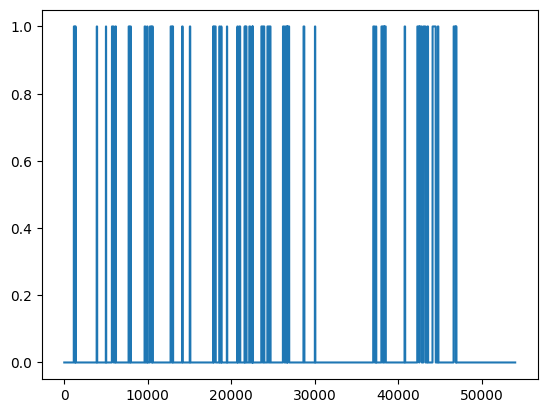

In [455]:
y_data['m3']
plt.plot(y_data['m3'])

In [461]:
with open("/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Model and Training Set Development/scratch_120624_predictions/predictions/PRX-03_Run_3_Computer_1_D8_Males_12DEC22.mp4_26.pkl", 'rb') as f:
    prediction = pickle.load(f)

In [495]:
len(prediction) * 30

53970

In [463]:
resh = np.reshape(y_data['m3'][:53970], (-1, 30))
ann_bin = np.mean(resh, 1)

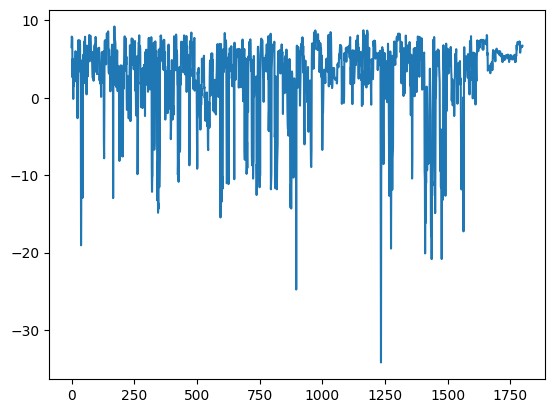

In [464]:
plt.plot((np.squeeze(prediction) - ann_bin))

In [465]:
prediction.shape

(1799, 1)

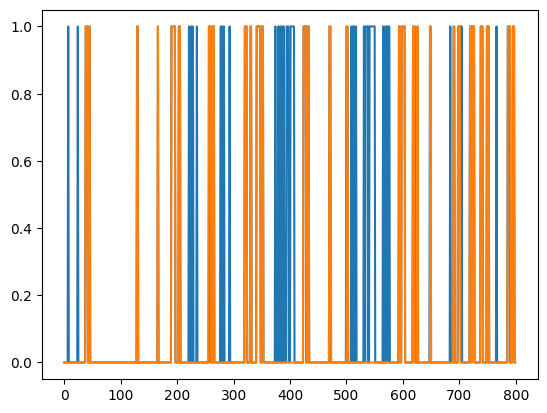

In [473]:
plt.plot((np.squeeze(prediction) < 0)[:800])
plt.plot(ann_bin[:800] > 0.3)

In [482]:
((np.squeeze(prediction) <0).astype(int) != (ann_bin >0.3).astype(int)).sum()

122

In [485]:
pred = np.squeeze(prediction) < 0
ann = ann_bin > 0.3

In [ ]:
difference = pred[pred != ann]
fp = difference.sum()
fn = len(difference) - fp

In [498]:
fp/len(pred)

0.06614785992217899

In [490]:
fn

3

In [491]:
scratch = np.zeros(frames)
for j in tp:
    # print(j)
    scratch[j[0]:j[1]] = [1] * (j[1] - j[0])
    

In [493]:
(scratch == y_data['m3']).all()

True

In [496]:
data_specs

{'num_frames': 30, 'frame_step': 1, 'buffer': 300, 'output_size': (172, 172)}

In [497]:
model_data

{'checkpoint_dir': '/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Models/scratch_120624/scratch_120624_checkpoints',
 'checkpoint_path': None,
 'model_id': 'a0',
 'resolution': 172,
 'batch_size': 8,
 'num_frames': 30,
 'num_classes': 1,
 'loss_name': None,
 'learning_rate': 0.0001,
 'class_labels': {'Not Scratch': 1, 'Scratch': 0}}

In [507]:
def calculate_validation_ann_csv(csv_filename, validation_folder, save_folder, num_frames, save = False):
    df, meta = load_experiment_table(csv_filename)

    prediction_folder = os.path.join(save_folder, 'predictions')
    ann_scores = []
    for ind, row in df.iterrows():

        ann_file = os.path.join(validation_folder, 'Validated_' + row['File Name'] + '_' + str(row['Subject #']) + '.csv')
        pred_file = os.path.join(prediction_folder, row['File Name'] + '_' + str(row['Subject #']) + '.pkl')
        with open(pred_file, 'rb') as f:
            prediction = pickle.load(f)

        via_output = pd.read_csv(ann_file, skiprows = 9)
        tc = via_output['temporal_coordinates']
        start_time = row['Scoring Start (min)'] * 60
        _, _, fps, _ = get_params_from_vid(os.path.join(row['Folder Path'], row['File Name']))
        tc2 = np.array([(np.array(literal_eval(a)) ) for a in tc])- start_time
        tp = np.array([np.round(a * fps ).astype(int) for a in tc2])
        clip_length = row['Scoring End (min)'] - row['Scoring Start (min)']
        frames = int(fps * 60 * clip_length)
        scratch = np.zeros(frames)
        for j in tp:
            scratch[j[0]:j[1]] = [1] * (j[1] - j[0])
        
        max_frame = len(prediction) * num_frames
        ann_bin = np.mean(np.reshape(scratch[:max_frame], (-1, num_frames)), 1)

        pred = np.squeeze(prediction) < 0
        ann = ann_bin > 0.3
        difference = pred[pred != ann]
        fp = difference.sum()
        fn = len(difference) - fp
        ann_scores.append({'File Name': row['File Name'], 'Subject #': row['Subject #'], 
                           'fp count': fp, 'fp percent': (fp/len(pred))*100, 'fn count': fn, 
                           'fn percent': (fn/len(pred))*100})
    
    
    scored_df = pd.DataFrame(ann_scores)
    if save:
        output_file = os.path.join(save_folder, 'scored_' + os.path.basename(csv_filename))
        scored_df.write_csv(output_file)

    return scored_df


In [508]:
csv_filename = "/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/PRX_03_Validation_Sheet_Full_Ann.csv"
save_folder = "/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Model and Training Set Development/scratch_120624_predictions"
validation_folder = "/Users/rebeccakrall/Desktop"
num_frames = 30

In [599]:
ann_file = "/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Validation/Validated_PRX-03_Run_3_Computer_1_D8_Males_12DEC22.mp4_26.csv"        
via_output = pd.read_csv(ann_file, skiprows = 9)
tc = via_output['temporal_coordinates']
tc2 = np.array([(np.array(literal_eval(a)) ) for a in tc])- (120)

In [600]:
bin_annotations(tc2)

([22.349197423142215,
  27.59145860223157,
  57.41326169054889,
  4.863309999999956,
  65.04832399382576,
  10.084052194400329],
 [8, 10, 19, 2, 12, 2])

In [509]:
scored_df = calculate_validation_ann_csv(csv_filename, validation_folder, save_folder, num_frames, save = False)

/Users/rebeccakrall/Code/Multiclass_Behavioral_Classification/prediction.py:239: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '/Users/rebeccakrall/Data/Video Processing and Prediction/Scratching_Projects/PRX_03/PRX_03_Videos' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tbl.loc[tbl['Folder Path'].isna(),'Folder Path'] = metadata['Folder Path']


In [505]:
df, meta = load_experiment_table(csv_filename)

/Users/rebeccakrall/Code/Multiclass_Behavioral_Classification/prediction.py:239: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '/Users/rebeccakrall/Data/Video Processing and Prediction/Scratching_Projects/PRX_03/PRX_03_Videos' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tbl.loc[tbl['Folder Path'].isna(),'Folder Path'] = metadata['Folder Path']


In [581]:
scored_df

,File Name,Subject #,fp count,fp percent,fn count,fn percent
0,PRX-03_Run_3_Computer_1_D8_Males_12DEC22.mp4,26,119,6.614786,3,0.166759
1,PRX_03_Run_3_Computer_2_D12_Males_16DEC22.mp4,31,15,0.833797,1,0.055586
2,PRX_03_Run_3_Computer_2_D12_Males_16DEC22.mp4,33,92,5.113952,1,0.055586


In [583]:
(119 * 30)/fps

119.04156316757306

In [511]:
pd.concat([scored_df, scored_df])

,File Name,Subject #,fp count,fp percent,fn count,fn percent
0,PRX-03_Run_3_Computer_1_D8_Males_12DEC22.mp4,26,119,6.614786,3,0.166759
1,PRX_03_Run_3_Computer_2_D12_Males_16DEC22.mp4,31,15,0.833797,1,0.055586
2,PRX_03_Run_3_Computer_2_D12_Males_16DEC22.mp4,33,92,5.113952,1,0.055586
0,PRX-03_Run_3_Computer_1_D8_Males_12DEC22.mp4,26,119,6.614786,3,0.166759
1,PRX_03_Run_3_Computer_2_D12_Males_16DEC22.mp4,31,15,0.833797,1,0.055586
2,PRX_03_Run_3_Computer_2_D12_Males_16DEC22.mp4,33,92,5.113952,1,0.055586


In [577]:
def calculate_validation_csv_metrics(scored):

    scores = {}
    num_bins = max([int(x.split('Bin ')[-1]) for x in scored.columns if ': Bin' in x])
    for x in range(num_bins):
        scored['dif '+str(x+1)] = scored['bin '+str(x+1)] - scored['Duration: Bin '+str(x+1)]

    
    difs = scored.filter(like = 'dif')

    
    scored['abs sum'] = difs.abs().sum(axis = 1)
    scores['Full Video: Abs difference mean'] = scored['abs sum'].mean()
    scores['Full Video: Abs difference median'] = scored['abs sum'].median()
    scores['Full Video: Abs difference top'] = scored['abs sum'].max()
    scores['Worst Video'] = scored['File Name'].iloc[scored['abs sum'].argmax()]+ '_' + str(scored['Subject #'].iloc[scored['abs sum'].argmax()])
    scores['Bin: Max Difference'] = difs.max(axis = None)
    scores['Bin: Min Difference'] = difs.min(axis = None)
    scores['Bin: Mean Difference'] = difs.mean(axis = None)
    scores['Bin: Median Difference'] = difs.median(axis = None)
    scores['Bin: FP count'] = (difs < 0).sum().sum() 
    scores['Bin: FN count'] = (difs > 0).sum().sum() 
    scores['Bin: FP percent'] =  (scores['Bin: FP count'] /difs.count().sum()) * 100
    scores['Bin: FN percent'] =  (scores['Bin: FN count'] /difs.count().sum()) * 100

    dif_array = np.array(difs)
    scores['Bin: FP average'] =np.mean(dif_array[dif_array < 0])
    scores['Bin: FP median'] = np.median(dif_array[dif_array < 0])

    scores['Bin: FN average'] =np.mean(dif_array[dif_array > 0])
    scores['Bin: FN median'] = np.median(dif_array[dif_array > 0])

    if "Elapsed Minutes" in scored.columns:
        scores['mean run time'] = scored['Elapsed Minutes'].mean()
    else:
        scores['mean run time'] = None

    return scored, scores

In [578]:
df = pd.read_csv("/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Model and Training Set Development/scratch_120624_predictions/fixed_scored_PRX_03_Validation_Sheet.csv")
scored, scores = calculate_validation_csv_metrics(df)

In [602]:
scores['checkpoint'] = 'cp_02.ckpt'

In [603]:
scores['date'] = '020425'

In [608]:
s = pd.DataFrame(scores)
s.to_csv("/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Models/scratch_120624/scratch_120624_validations/scratch_120624_validation_020425/manual_scores.csv")

ValueError: If using all scalar values, you must pass an index

In [615]:
pd.DataFrame(scores, index = [0]).to_csv("/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Models/scratch_120624/scratch_120624_validations/scratch_120624_validation_020425/manual_scores.csv")

In [617]:
scored_df['checkpoint'] = 'cp_02.ckpt'
scored_df['date'] = '020425'

In [619]:
scored_df.to_csv("/Users/rebeccakrall/Data/MoViNet Models After Jan 2025/Models/scratch_120624/scratch_120624_validations/scratch_120624_validation_020425/ann_scores.csv")